# Chapter 5 - Ex3: Phân tích dữ liệu Movies
### Dữ liệu được lấy từ MovieLens website. 
### Download the Dataset
Theo link: 
* **Data Source:** MovieLens web site (filename: ml-latest-small.zip)
* **Location:** https://grouplens.org/datasets/movielens/


# Part 1: Sử dụng Pandas để đọc dữ liệu

### Sử dụng 3 file CSV sau:
* **ratings.csv :** *userId*,*movieId*,*rating*, *timestamp*
* **tags.csv :** *userId*,*movieId*, *tag*, *timestamp*
* **movies.csv :** *movieId*, *title*, *genres* <br>
** Sử dụng *pd.read_csv()* để đọc dữ liệu **

### Yêu cầu
1. Đọc file movies.csv => đưa dữ liệu vào movies. Cho biết kiểu của dữ liệu của movies. In shape của movies. In 10 dòng đầu tiên của movies
2. Đọc file tags.csv => đưa dữ liệu vào tags. Cho biết kiểu của dữ liệu của tags. In shape của tags. In head() của tags
3. Đọc file ratings.csv => đưa dữ liệu vào ratings. Cho biết kiểu của dữ liệu của ratings. In shape của ratings. In head() của ratings

In [1]:
import pandas as pd
# Câu 1:
movies = pd.read_csv('./movies_data/movies.csv', sep=',')
print(type(movies))
print(movies.shape)

<class 'pandas.core.frame.DataFrame'>
(9125, 3)


In [2]:
movies.head(10)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [3]:
# Câu 2: 
tags = pd.read_csv('./movies_data/tags.csv', sep=',')
print(type(tags))
print(tags.shape)
print(tags.head())

<class 'pandas.core.frame.DataFrame'>
(1296, 4)
   userId  movieId                      tag   timestamp
0      15      339  sandra 'boring' bullock  1138537770
1      15     1955                  dentist  1193435061
2      15     7478                 Cambodia  1170560997
3      15    32892                  Russian  1170626366
4      15    34162              forgettable  1141391765


In [4]:
# Câu 3:
ratings = pd.read_csv('./movies_data/ratings.csv', sep=',', parse_dates=['timestamp'])
print(type(ratings))
print(ratings.shape)
print(ratings.head())

<class 'pandas.core.frame.DataFrame'>
(100004, 4)
   userId  movieId  rating   timestamp
0       1       31     2.5  1260759144
1       1     1029     3.0  1260759179
2       1     1061     3.0  1260759182
3       1     1129     2.0  1260759185
4       1     1172     4.0  1260759205


## Part 2: Data Structures

### Series
1. Lấy dòng đầu tiên của tags và đặt tên là row_0. Cho biết kiểu dữ liệu và in dòng này.
2. In các index của row_0.
3. In userId của row_0
4. Kiểm tra xem index 'rating' có trong row_0 hay không?
5. Cho biết tên của row_0
6. Đổi tên của row_0 thành 'first_row'. In kết quả

In [5]:
# Câu 1:
row_0 = tags.iloc[0]
type(row_0)

pandas.core.series.Series

In [6]:
print(row_0)

userId                            15
movieId                          339
tag          sandra 'boring' bullock
timestamp                 1138537770
Name: 0, dtype: object


In [7]:
# Câu 2:
print(row_0.index)

Index(['userId', 'movieId', 'tag', 'timestamp'], dtype='object')


In [8]:
# Câu 3:
print(row_0['userId'])

15


In [9]:
# Câu 4:
print('rating' in row_0)

False


In [10]:
# Câu 5:
print(row_0.name)

0


In [11]:
# Câu 6:
row_0 = row_0.rename('first_row')
print(row_0.name)

first_row


## Part 3: DataFrames
1. In head(), index của tags
2. In tên các cột của tags
3. Tạo 1 biến tags_sub chứa các dòng 0, 10, 100, 1000 từ tags

In [12]:
# Câu 1: 
print(tags.head())

   userId  movieId                      tag   timestamp
0      15      339  sandra 'boring' bullock  1138537770
1      15     1955                  dentist  1193435061
2      15     7478                 Cambodia  1170560997
3      15    32892                  Russian  1170626366
4      15    34162              forgettable  1141391765


In [13]:
print(tags.index)

RangeIndex(start=0, stop=1296, step=1)


In [14]:
# Câu 2: 
print(tags.columns)

Index(['userId', 'movieId', 'tag', 'timestamp'], dtype='object')


In [15]:
# Câu 3: 
tags_sub = tags.iloc[[0, 10, 100, 1000]]
print(tags_sub)

      userId  movieId                      tag   timestamp
0         15      339  sandra 'boring' bullock  1138537770
10        15   100365                   uganda  1425876220
100      176   104841                   sexist  1384107184
1000     547    44199                toplist06  1197165844


## Part 4: Thống kê dữ liệu
1. Thực hiện thống kê chung dữ liệu ratings
2. Thực hiện thống kê chung dữ liệu 'rating' trong ratings
3. In giá trị trung bình, giá trị lớn nhất, giá trị nhỏ nhất, độ lệch chuẩn, giá trị có tuần suất xuất hiện nhiều nhất, hệ số tương quan của cột 'rating'
4. Lọc dữ liệu có 'rating' > 5. Dùng any() để kiểm tra
5. Lọc dữ liệu có 'rating' > 0. Dùng all() để kiểm tra

In [16]:
# Câu 1:
print(ratings.describe())

              userId        movieId         rating
count  100004.000000  100004.000000  100004.000000
mean      347.011310   12548.664363       3.543608
std       195.163838   26369.198969       1.058064
min         1.000000       1.000000       0.500000
25%       182.000000    1028.000000       3.000000
50%       367.000000    2406.500000       4.000000
75%       520.000000    5418.000000       4.000000
max       671.000000  163949.000000       5.000000


In [17]:
# Câu 2:
print(ratings['rating'].describe())

count    100004.000000
mean          3.543608
std           1.058064
min           0.500000
25%           3.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: rating, dtype: float64


In [18]:
# Câu 3:  
print(ratings['rating'].mean())

3.543608255669773


In [19]:
print(ratings.mean())

userId       3.470113e+02
movieId      1.254866e+04
rating       3.543608e+00
timestamp             inf
dtype: float64


In [20]:
print(ratings['rating'].min())

0.5


In [21]:
print(ratings['rating'].max())

5.0


In [22]:
print(ratings['rating'].std())

1.0580641091070389


In [23]:
print(ratings['rating'].mode())

0    4.0
dtype: float64


In [24]:
print(ratings.corr())

           userId   movieId    rating
userId   1.000000  0.007126  0.010467
movieId  0.007126  1.000000 -0.028894
rating   0.010467 -0.028894  1.000000


In [25]:
# Câu 4: 
filter_1 = ratings['rating'] > 5
print(filter_1.head())
print(filter_1.tail())
print(filter_1.any())

0    False
1    False
2    False
3    False
4    False
Name: rating, dtype: bool
99999     False
100000    False
100001    False
100002    False
100003    False
Name: rating, dtype: bool
False


In [26]:
# Câu 5: 
filter_2 = ratings['rating'] > 0
print(filter_2.all())

True


## Part 5: Làm sạch dữ liệu: Xử lý dữ liệu bị thiếu
1. In shape của movies. Cho biết trong movies có dữ liệu null hay không? Nếu có loại bỏ dòng có dữ liệu null.
2. In shape của ratings. Cho biết trong ratings có dữ liệu null hay không? Nếu có loại bỏ dòng có dữ liệu null.
3. In shape của tags. Cho biết trong tags có dữ liệu null hay không? Nếu có loại bỏ dòng có dữ liệu null. 


In [27]:
movies.shape

(9125, 3)

In [28]:
#is any row NULL ?

movies.isnull().any()

movieId    False
title      False
genres     False
dtype: bool

Thats nice ! No NULL values !

In [29]:
ratings.shape

(100004, 4)

In [30]:
#is any row NULL ?

ratings.isnull().any()

userId       False
movieId      False
rating       False
timestamp    False
dtype: bool

Thats nice ! No NULL values !

In [31]:
tags.shape

(1296, 4)

In [82]:
#is any row NULL ?

tags.isnull().any()

userId         False
movieId        False
tag            False
timestamp      False
parsed_time    False
dtype: bool

We have some tags which are NULL.

In [33]:
tags = tags.dropna()

In [83]:
#Check again: is any row NULL ?

tags.isnull().any()

userId         False
movieId        False
tag            False
timestamp      False
parsed_time    False
dtype: bool

In [84]:
tags.shape

(1296, 5)

Thats nice ! No NULL values ! Notice the number of lines have reduced.

## Part 6: Trực quan hóa dữ liệu

1. Vẽ biểu đồ histogram cột 'rating' của ratings
2. Vẽ biểu đồ bar plot cột 'rating' của ratings
3. Thống kê describe() cột 'rating' của ratings

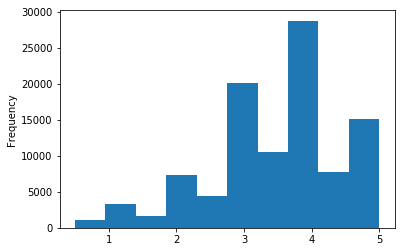

In [85]:
# Câu 1
ratings['rating'].plot.hist()

In [86]:
ratings['rating']

0         2.5
1         3.0
2         3.0
3         2.0
4         4.0
5         2.0
6         2.0
7         2.0
8         3.5
9         2.0
10        2.5
11        1.0
12        4.0
13        4.0
14        3.0
15        2.0
16        2.0
17        2.5
18        1.0
19        3.0
20        4.0
21        5.0
22        5.0
23        4.0
24        4.0
25        3.0
26        3.0
27        4.0
28        3.0
29        5.0
         ... 
99974     4.5
99975     5.0
99976     3.5
99977     4.0
99978     5.0
99979     5.0
99980     4.5
99981     4.5
99982     5.0
99983     4.0
99984     2.0
99985     2.0
99986     3.0
99987     4.0
99988     4.0
99989     4.5
99990     3.0
99991     4.0
99992     4.0
99993     3.5
99994     5.0
99995     4.0
99996     4.5
99997     4.0
99998     2.5
99999     2.5
100000    4.0
100001    4.0
100002    2.5
100003    3.5
Name: rating, Length: 100004, dtype: float64

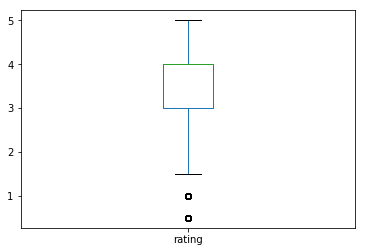

In [37]:
# Câu 2
ratings['rating'].plot.box()

In [38]:
# Câu 3:
print(ratings['rating'].describe())

count    100004.000000
mean          3.543608
std           1.058064
min           0.500000
25%           3.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: rating, dtype: float64


## Part 7: Lấy dữ liệu trên cột
1. Tạo tag chứa các dòng đầu của cột 'tag' trong tags. Cho biết kiểu dữ liệu của tag. In tag
2. Tạo title_genres chứa các dòng đầu của các cột 'title', 'genres' trong movies. Cho biết kiểu dữ liệu của title_genres. In title_genres
3. Cho biết dữ liệu ratings có bao nhiêu dòng? Tạo ratings_end chứa 10 dòng cuối của ratings. In ratings_end.
4. In head của tags. Tạo tag_counts chứa giá trị của cột 'tag' dưới dạng value có giá là 1 nếu có dữ liệu (dùng tags['tag'].value_counts() ). In kiểu và shape của tag_counts. Tạo tag_counts_end chứa 10 phần tử cuối của tag_counts. In tag_counts_end. 
5. Vẽ biểu đồ khối (bar) của tag_counts_end

In [39]:
# Câu 1:
tag = tags['tag'].head()
print(type(tag))
print(tag)

<class 'pandas.core.series.Series'>
0    sandra 'boring' bullock
1                    dentist
2                   Cambodia
3                    Russian
4                forgettable
Name: tag, dtype: object


In [40]:
# Câu 2:
title_genres = movies[['title','genres']].head()
print(type(title_genres))
print(title_genres)

<class 'pandas.core.frame.DataFrame'>
                                title  \
0                    Toy Story (1995)   
1                      Jumanji (1995)   
2             Grumpier Old Men (1995)   
3            Waiting to Exhale (1995)   
4  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  


In [41]:
# Câu 3:
print('Số dòng của ratings:', ratings.shape[0])
ratings_10_end = ratings[-10:]
print(ratings_10_end)

Số dòng của ratings: 100004
        userId  movieId  rating   timestamp
99994      671     5952     5.0  1063502716
99995      671     5989     4.0  1064890625
99996      671     5991     4.5  1064245387
99997      671     5995     4.0  1066793014
99998      671     6212     2.5  1065149436
99999      671     6268     2.5  1065579370
100000     671     6269     4.0  1065149201
100001     671     6365     4.0  1070940363
100002     671     6385     2.5  1070979663
100003     671     6565     3.5  1074784724


In [42]:
# Câu 4:
print(tags['tag'].head())
tag_counts = tags['tag'].value_counts()
print(type(tag_counts))
print(tag_counts.shape)
tag_counts_end = tag_counts[-10:]
print(tag_counts_end)

0    sandra 'boring' bullock
1                    dentist
2                   Cambodia
3                    Russian
4                forgettable
Name: tag, dtype: object
<class 'pandas.core.series.Series'>
(582,)
baseball              1
existentialism        1
feel good             1
japanese influence    1
beer                  1
american idiocy       1
meaning of life       1
children              1
stallone              1
series                1
Name: tag, dtype: int64


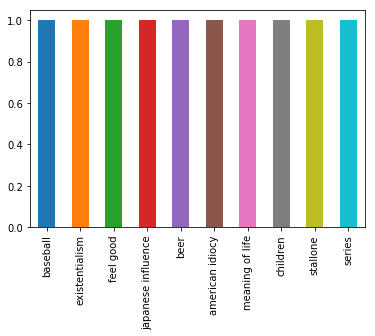

In [43]:
# Câu 5:
tag_counts_end.plot.bar()

## Part 8: Lọc dữ liệu trên dòng
1. Tạo is_highly_rated theo điều kiện: có 'rating' >= 4.0 của ratings. In head của is_highly_rated. In từ dòng 30 đến 50 của ratings theo is_highly_rated.
2. Tạo is_animation theo điều kiện trong genres của movies có chứa chuỗi 'Animation'. In head của is_animation. In từ dòng 5 đến dòng 15 của movies theo is_animation.
3. In 15 dòng đầu của movies theo is_animation

In [44]:
# Câu 1:
is_highly_rated = ratings['rating'] >= 4
print(is_highly_rated.head())
print(ratings[is_highly_rated][30:50])

0    False
1    False
2    False
3    False
4     True
Name: rating, dtype: bool
     userId  movieId  rating   timestamp
83        2      551     5.0   835355767
85        2      585     5.0   835355817
89        2      589     5.0   835355697
90        2      590     5.0   835355395
91        2      592     5.0   835355395
94        2      661     4.0   835356141
95        2      720     4.0   835355978
97        3      110     4.0  1298922049
100       3      296     4.5  1298862418
101       3      318     5.0  1298862121
103       3      356     5.0  1298862167
111       3      778     4.0  1298863157
113       3     1197     5.0  1298932770
115       3     1235     4.0  1298861628
117       3     1378     4.0  1298861658
119       3     1721     4.5  1298923236
120       3     1884     4.0  1298863143
121       3     2028     4.0  1298921862
122       3     2318     4.0  1298861753
128       3     2841     4.0  1298861733


In [45]:
# Câu 2:
is_animation = movies['genres'].str.contains('Animation')
print(is_animation.head())
movies[is_animation][5:15]

0     True
1    False
2    False
3    False
4    False
Name: genres, dtype: bool


,movieId,title,genres
279,313,"Swan Princess, The (1994)",Animation|Children
328,364,"Lion King, The (1994)",Adventure|Animation|Children|Drama|Musical|IMAX
354,392,"Secret Adventures of Tom Thumb, The (1993)",Adventure|Animation
494,551,"Nightmare Before Christmas, The (1993)",Animation|Children|Fantasy|Musical
500,558,"Pagemaster, The (1994)",Action|Adventure|Animation|Children|Fantasy
521,588,Aladdin (1992),Adventure|Animation|Children|Comedy|Musical
526,594,Snow White and the Seven Dwarfs (1937),Animation|Children|Drama|Fantasy|Musical
527,595,Beauty and the Beast (1991),Animation|Children|Fantasy|Musical|Romance|IMAX
528,596,Pinocchio (1940),Animation|Children|Fantasy|Musical
537,610,Heavy Metal (1981),Action|Adventure|Animation|Horror|Sci-Fi


In [46]:
# Câu 5:
movies[is_animation].head(15)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
12,13,Balto (1995),Adventure|Animation|Children
46,48,Pocahontas (1995),Animation|Children|Drama|Musical|Romance
211,239,"Goofy Movie, A (1995)",Animation|Children|Comedy|Romance
216,244,Gumby: The Movie (1995),Animation|Children
279,313,"Swan Princess, The (1994)",Animation|Children
328,364,"Lion King, The (1994)",Adventure|Animation|Children|Drama|Musical|IMAX
354,392,"Secret Adventures of Tom Thumb, The (1993)",Adventure|Animation
494,551,"Nightmare Before Christmas, The (1993)",Animation|Children|Fantasy|Musical
500,558,"Pagemaster, The (1994)",Action|Adventure|Animation|Children|Fantasy


## Part 9: Nhóm dữ liệu và tổng hợp
1. Tạo ratings_count chứa 2 cột là 'movieId','rating', nhóm dữ liệu theo rating, đếm theo movieId. In kết quả.
2. Tạo average_rating chứa 2 cột là 'movieId','rating', nhóm dữ liệu theo movieId, tính trung bình theo rating. In head của average_rating.
3. Tạo movie_count chứa 2 cột là 'movieId','rating', nhóm dữ liệu theo movieId, đếm theo rating. In head, tail của movie_count.

In [47]:
# Câu 1:
ratings_count = ratings[['movieId','rating']].groupby('rating').count()
print(ratings_count)

        movieId
rating         
0.5        1101
1.0        3326
1.5        1687
2.0        7271
2.5        4449
3.0       20064
3.5       10538
4.0       28750
4.5        7723
5.0       15095


In [48]:
# Câu 2
average_rating = ratings[['movieId','rating']].groupby('movieId').mean()
print(average_rating.shape)
average_rating.head()

(9066, 1)


,rating
movieId,
1,3.872470
2,3.401869
3,3.161017
4,2.384615
5,3.267857


In [49]:
# Câu 3
movie_count = ratings[['movieId','rating']].groupby('movieId').count()
movie_count.head()

,rating
movieId,
1,247
2,107
3,59
4,13
5,56


In [50]:
movie_count.tail()

,rating
movieId,
161944,1
162376,1
162542,1
162672,1
163949,1


## Part 10: Gộp DataFrame
1. In head của tags, movies
2. Tạo t bằng cách gộp dữ liệu của movies và tags, theo moviedId. In head và tail của t

In [51]:
tags.head()

,userId,movieId,tag,timestamp
0,15,339,sandra 'boring' bullock,1138537770
1,15,1955,dentist,1193435061
2,15,7478,Cambodia,1170560997
3,15,32892,Russian,1170626366
4,15,34162,forgettable,1141391765


In [52]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [53]:
t = movies.merge(tags, on='movieId', how='inner')
t.head()

,movieId,title,genres,userId,tag,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,501,Pixar,1292956344
1,5,Father of the Bride Part II (1995),Comedy,431,steve martin,1140455432
2,47,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,364,biblical,1444534976
3,47,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,364,crime,1444534982
4,47,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,364,dark,1444534994


In [54]:
t.tail()

,movieId,title,genres,userId,tag,timestamp
1291,161582,Hell or High Water (2016),Crime|Drama,547,bkk,1472737430
1292,163056,Shin Godzilla (2016),Action|Adventure|Fantasy|Sci-Fi,547,bkk,1472178747
1293,163949,The Beatles: Eight Days a Week - The Touring Y...,Documentary,547,toplist16,1476419254
1294,164977,The Gay Desperado (1936),Comedy,547,tivo,1476113746
1295,164979,"Women of '69, Unboxed",Documentary,547,tivo,1476113908


## Part 11: Kết hợp giữa nhóm, gộp, lọc dữ liệu
1. Tạo avg_ratings từ ratings không lấy cột index, nhóm dữ liệu theo movieId, tính trung bình theo rating. Xóa bỏ cột userId. In head của avg_ratings
2. Tạo box_office bằng cách gộp dữ liệu của movies và avg_ratings, theo moviedId
3. Tạo is_highly_rated theo điều kiện 'rating' >=4 của box_office. In dữ liệu 5 dòng cuối của is_highly_rated, box_office theo is_highly_rated  
4. Tạo is_comedy theo điều kiện là 'genres' của box_office có chứa chuỗi 'Comediy'. In dữ liệu 5 dòng cuối của box_office theo is_comedy
5. In dữ liệu 5 dòng cuối của box_office theo is_comedy và is_highly_rated

In [55]:
# Câu 1
avg_ratings = ratings.groupby('movieId', as_index=False).mean()
del avg_ratings['userId']
avg_ratings.head()

,movieId,rating
0,1,3.872470
1,2,3.401869
2,3,3.161017
3,4,2.384615
4,5,3.267857


In [56]:
# Câu 2
box_office = movies.merge(avg_ratings, on='movieId', how='inner')
box_office.tail()

,movieId,title,genres,rating
9061,161944,The Last Brickmaker in America (2001),Drama,5.0
9062,162376,Stranger Things,Drama,4.5
9063,162542,Rustom (2016),Romance|Thriller,5.0
9064,162672,Mohenjo Daro (2016),Adventure|Drama|Romance,3.0
9065,163949,The Beatles: Eight Days a Week - The Touring Y...,Documentary,5.0


In [57]:
# Câu 3:
is_highly_rated = box_office['rating'] >= 4.0
print(is_highly_rated[-5:])
box_office[is_highly_rated][-5:]

9061     True
9062     True
9063     True
9064    False
9065     True
Name: rating, dtype: bool


,movieId,title,genres,rating
9055,160718,Piper (2016),Animation,4.0
9061,161944,The Last Brickmaker in America (2001),Drama,5.0
9062,162376,Stranger Things,Drama,4.5
9063,162542,Rustom (2016),Romance|Thriller,5.0
9065,163949,The Beatles: Eight Days a Week - The Touring Y...,Documentary,5.0


In [58]:
# Câu 4: 
is_comedy = box_office['genres'].str.contains('Comedy')
box_office[is_comedy][:5]

,movieId,title,genres,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.872470
2,3,Grumpier Old Men (1995),Comedy|Romance,3.161017
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.384615
4,5,Father of the Bride Part II (1995),Comedy,3.267857
6,7,Sabrina (1995),Comedy|Romance,3.283019


In [59]:
# Câu 5:
box_office[is_comedy & is_highly_rated][-5:]

,movieId,title,genres,rating
9019,152081,Zootopia (2016),Action|Adventure|Animation|Children|Comedy,4.0
9023,153584,The Last Days of Emma Blank (2009),Comedy,5.0
9027,156025,Ice Age: The Great Egg-Scapade (2016),Adventure|Animation|Children|Comedy,5.0
9037,158314,Daniel Tosh: Completely Serious (2007),Comedy,4.5
9052,160567,Mike & Dave Need Wedding Dates (2016),Comedy,4.0


## Part 12: Thao tác trên dữ liệu chuỗi
1. In head của movies
2. Tạo movie_genres từ cột 'genres' bằng cách cắt cột 'genres' với '|'. In kiểu dữ liệu và shape của movie_genres. In 10 dòng cuối của movie_genres
3. Thêm cột mới cho movie_genres có tên là 'isComedy', giá trị sẽ là True nếu trong movies['genres'] có chứa chuỗi 'Comedy', ngược lại là false. In 10 dòng đầu của movie_genres
4. Thêm cột mới cho movies có tên là 'year' với year được lấy ra từ cột 'title'. In head và tail cùa movies


In [60]:
# Câu 1
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [89]:
# Câu 2: Cắt 'genres' thành nhiều cột với split('|') 
movie_genres = movies['genres'].str.split('|', expand=True)

In [90]:
movie_genres[:10]

,0,1,2,3,4,5,6,7,8,9
0,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None
1,Adventure,Children,Fantasy,None,None,None,None,None,None,None
2,Comedy,Romance,None,None,None,None,None,None,None,None
3,Comedy,Drama,Romance,None,None,None,None,None,None,None
4,Comedy,None,None,None,None,None,None,None,None,None
5,Action,Crime,Thriller,None,None,None,None,None,None,None
6,Comedy,Romance,None,None,None,None,None,None,None,None
7,Adventure,Children,None,None,None,None,None,None,None,None
8,Action,None,None,None,None,None,None,None,None,None
9,Action,Adventure,Thriller,None,None,None,None,None,None,None


In [63]:
# Câu 4: Thêm cột
movie_genres['isComedy'] = movies['genres'].str.contains('Comedy')

In [64]:
movie_genres[:10]

,0,1,2,3,4,5,6,7,8,9,isComedy
0,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None,True
1,Adventure,Children,Fantasy,None,None,None,None,None,None,None,False
2,Comedy,Romance,None,None,None,None,None,None,None,None,True
3,Comedy,Drama,Romance,None,None,None,None,None,None,None,True
4,Comedy,None,None,None,None,None,None,None,None,None,True
5,Action,Crime,Thriller,None,None,None,None,None,None,None,False
6,Comedy,Romance,None,None,None,None,None,None,None,None,True
7,Adventure,Children,None,None,None,None,None,None,None,None,False
8,Action,None,None,None,None,None,None,None,None,None,False
9,Action,Adventure,Thriller,None,None,None,None,None,None,None,False


In [65]:
# Câu 4: 
movies['year'] = movies['title'].str.extract('.*\((.*)\).*', expand=True)

In [66]:
movies.head()

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [67]:
movies.tail()

,movieId,title,genres,year
9120,162672,Mohenjo Daro (2016),Adventure|Drama|Romance,2016
9121,163056,Shin Godzilla (2016),Action|Adventure|Fantasy|Sci-Fi,2016
9122,163949,The Beatles: Eight Days a Week - The Touring Y...,Documentary,2016
9123,164977,The Gay Desperado (1936),Comedy,1936
9124,164979,"Women of '69, Unboxed",Documentary,NaN


## Part 13: Parsing Timestamps
1. Cho biết kiểu dữ liệu của các cột trong tags. In head của tags
2. Tạo cột parsed_time trong tags bằng cách đổi thời gian sang định dạng DateTime của Python. Cho biết kiểu dữ liệu của cột parsed_time. In head của tags.
3. Tạo selected_rows chứa các dòng có tags['parsed_time'] > '2015-02-01'. In shape của tags và selected_rows 
4. Sắp xếp dữ liệu tags tăng dần theo cột parsed_time. In 10 dòng dữ liệu đầu tiên của tags

In [68]:
tags = pd.read_csv('./movies_data/tags.csv', sep=',')

In [69]:
# Câu 1:
tags.dtypes

userId        int64
movieId       int64
tag          object
timestamp     int64
dtype: object

In [70]:
tags.head()

,userId,movieId,tag,timestamp
0,15,339,sandra 'boring' bullock,1138537770
1,15,1955,dentist,1193435061
2,15,7478,Cambodia,1170560997
3,15,32892,Russian,1170626366
4,15,34162,forgettable,1141391765


In [71]:
# Câu 2
tags['parsed_time'] = pd.to_datetime(tags['timestamp'], unit='s')

In [72]:
tags['parsed_time'].dtype

dtype('<M8[ns]')

In [73]:
tags.head()

,userId,movieId,tag,timestamp,parsed_time
0,15,339,sandra 'boring' bullock,1138537770,2006-01-29 12:29:30
1,15,1955,dentist,1193435061,2007-10-26 21:44:21
2,15,7478,Cambodia,1170560997,2007-02-04 03:49:57
3,15,32892,Russian,1170626366,2007-02-04 21:59:26
4,15,34162,forgettable,1141391765,2006-03-03 13:16:05


In [74]:
# Câu 3
greater_than_t = tags['parsed_time'] > '2015-02-01'

selected_rows = tags[greater_than_t]

print(tags.shape)
print(selected_rows.shape)

(1296, 5)
(435, 5)


In [75]:
# Câu 4: Sắp xếp dữ liệu tags tăng dần theo cột parsed_time. In 10 dòng dữ liệu đầu tiên của tags
tags.sort_values(by='parsed_time', ascending=True)[:10]

,userId,movieId,tag,timestamp,parsed_time
338,353,35836,dumb,1137217440,2006-01-14 05:44:00
0,15,339,sandra 'boring' bullock,1138537770,2006-01-29 12:29:30
232,294,36401,fairy tales,1138983064,2006-02-03 16:11:04
229,294,6754,vampire,1138983469,2006-02-03 16:17:49
333,353,4721,As historicaly correct as Germany winning WW2,1140389056,2006-02-19 22:44:16
334,353,4721,but still a fun movie.,1140389056,2006-02-19 22:44:16
335,353,7376,"The Rocks ""finest"" work need I say more?",1140389511,2006-02-19 22:51:51
336,353,31221,Try not to mistake this for an episode of Alias,1140389595,2006-02-19 22:53:15
231,294,8865,unique look,1140395930,2006-02-20 00:38:50
230,294,8865,1940's feel,1140395930,2006-02-20 00:38:50


## Part 14: Tính trung bình của Movie Ratings theo thời gian
### Movie ratings có liên quan đến năm ra mắt hay không?
1. Tạo average_rating từ ratings[['movieId','rating']], nhóm dữ liệu theo movieId, không lấy cột index, tính trung bình theo rating. In tail của average_rating
2. Tạo joined bằng cách gộp dữ liệu của movies và average_rating theo 'movieId'. In head của joined và tính toán tương quan các cột (corr) của joined
3. Tạo yearly_average từ joined[['year','rating']], nhóm dữ liệu theo 'year', không lấy cột index, tính trung bình theo rating. In shape của yearly_average. In 10 dòng đầu của yearly_average
4. Sắp xếp tăng dần yearly_average. Vẽ biểu đồ plot() cho 10 dòng cuối của yearly_average sau khi sắp tăng dần

In [76]:
# Câu 1: 
#average_rating = ratings[['movieId','rating']].groupby('movieId', as_index=False).mean()
average_rating = ratings[['movieId','rating']].groupby('movieId', as_index=True).mean()
average_rating.tail()

,rating
movieId,
161944,5.0
162376,4.5
162542,5.0
162672,3.0
163949,5.0


In [77]:
# Câu 2
joined = movies.merge(average_rating, on='movieId', how='inner')
joined.head()

,movieId,title,genres,year,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,3.872470
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995,3.401869
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,3.161017
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,2.384615
4,5,Father of the Bride Part II (1995),Comedy,1995,3.267857


In [78]:
joined.corr()

,movieId,rating
movieId,1.000000,-0.041213
rating,-0.041213,1.000000


In [79]:
# Câu 3: 
yearly_average = joined[['year','rating']].groupby('year', as_index=False).mean()
print(yearly_average.shape)
yearly_average[:10]

(105, 2)


,year,rating
0,1902,4.333333
1,1915,3.000000
2,1916,3.500000
3,1917,4.250000
4,1918,4.250000
5,1919,3.000000
6,1920,2.500000
7,1921,4.387500
8,1922,3.926587
9,1923,4.166667


In [80]:
# Câu 4: 
yearly_average_asc = yearly_average.sort_values(by ='year', ascending=True)
yearly_average_asc[-20:]

,year,rating
85,1998,3.266041
86,1999,3.201568
87,2000,3.191775
88,2001,3.133080
89,2002,3.194889
90,2003,3.154081
91,2004,3.300785
92,2005,3.333775
93,2006,3.265219
94,2007,3.381744


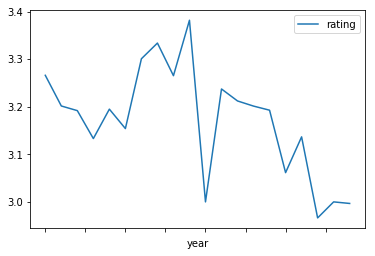

In [81]:
# yearly_average_asc[-20:].plot(x='year', y='rating', figsize=(15,10), grid=True)
yearly_average_asc[-20:].plot(x='year', y='rating')

## Quan sát biểu đồ trên, nhận xét:
1. Những năm nào có rating đặc biệt cao/thấp?
2. Có dữ liệu năm nào không phù hợp (ngoại lai) không?